# Project - Sentiment Classifier

Provided are some synthetic (fake, semi-randomly generated) twitter data in a csv file named project_twitter_data.csv which has the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet. We have also words that express positive sentiment and negative sentiment, in the files *positive_words.txt* and *negative_words.txt*.

The task is to build a sentiment classifier, which will detect how positive or negative each tweet is. we will create a csv file, which contains columns for the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score for each tweet. At the end, you upload the csv file to Excel or Google Sheets, and produce a graph of the Net Score vs Number of Retweets.

To start, we need define a function called `strip_punctuation` which takes one parameter, a string which represents a word, and removes characters considered punctuation from everywhere in the word. 

In [1]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

def strip_punctuation( word: str) ->str:
    """ this Takes a word and remove any and all none english characters from the word, 
    returning a word that contains only the 26 letters from the english alphabeth
    """
    for chars in punctuation_chars:
            word = word.replace(chars, "")
    return word
strip_punctuation("@@@#""hello!::;;")

'hello'

Next, we define a function called `get_pos` which takes one parameter, a string which represents one or more sentences, and calculates how many words in the string are considered positive words. Using the list, `positive_words` to determine what words will count as positive. The function should return a positive integer - how many occurrences there are of positive words in the text. Note that all of the words in `positive_words` are lower cased, so we will need to convert all the words in the input string to lower case as well.

In [2]:
# list of positive words to use
positive_words = []
with open("assets/positive_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())

# YOUR CODE HERE
def get_pos( sentence:str) ->int:
    '''function called get_pos which takes one parameter, a string which 
    represents one or more sentences, and calculates how many words in the string are 
    considered positive words
    '''
    sentence = sentence.split()
    count = 0
    for word in sentence:
        word =word.lower().strip()
        word_cleaned = strip_punctuation(word)
        if word_cleaned in positive_words:
            count +=1
    return count

get_pos("I love this excellent experience!")

2

Next, we define a function called `get_neg` which takes one parameter, a string which represents one or more sentences, and calculates how many words in the string are considered negative words. Using the list, `negative_words` to determine what words will count as negative. The function should return a positive integer - how many occurrences there are of negative words in the text. Note that all of the words in negative_words are lower cased, so we will need to convert all the words in the input string to lower case as well.

In [3]:
# list of negative words to use
negative_words = []
with open("assets/negative_words.txt") as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())

def get_neg(sentence: str)->int:
    ''' This is a function called `get_neg` which takes one parameter, a string which represents one or more sentences, and calculates how many words in the string             are considered negative words
    '''
    sentence = sentence.split()
    count = 0
    for word in sentence:
        word = strip_punctuation(word).strip().lower()
        if word in negative_words:
            count +=1
    return count
    

Finally, we would write code that opens the file project_twitter_data.csv which has the fake generated twitter data (the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet). the task is to build a sentiment classifier, which will detect how positive or negative each tweet is.

Now, we will write code to create a csv file called resulting_data.csv, which contains the Number of Retweets, Number of Replies, Positive Score (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score (how positive or negative the text is overall) for each tweet. The file should have those headers in that order.

In [4]:
import csv

with open ("assets/project_twitter_data.csv", 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    
    with open( "assets/resulting_data.csv",'w', newline ='') as outfile:
        csv_writer = csv.writer(outfile)
        csv_writer.writerow(["number_of_retweet","number_of_reply", "positive_score","negative_score", "net_score"])
        print("number_of_retweet","number_of_reply", "positive_score","negative_score", "net_score")

        for row in csv_reader:
            tweet = row[0].strip()
            number_of_retweet = int(row[1])
            number_of_reply =int(row[2])
            positive_score= get_pos(tweet)
            negative_score =get_neg(tweet)
            net_score = positive_score - negative_score
            csv_writer.writerow([number_of_retweet, number_of_reply, positive_score, negative_score, net_score])
            print(number_of_retweet, number_of_reply, positive_score, negative_score, net_score)

number_of_retweet number_of_reply positive_score negative_score net_score
3 0 0 0 0
1 0 2 2 0
1 2 1 0 1
3 1 1 0 1
6 0 2 0 2
9 5 2 0 2
19 0 2 0 2
0 0 0 3 -3
0 0 0 2 -2
82 2 4 0 4
0 0 0 1 -1
0 0 1 0 1
47 0 2 0 2
2 1 1 0 1
0 2 1 0 1
0 0 2 1 1
4 6 3 0 3
19 0 3 1 2
0 0 1 1 0


 Using the resulting .csv file from above, we will create a scatterplot of the Number of Retweets vs the Net Score 



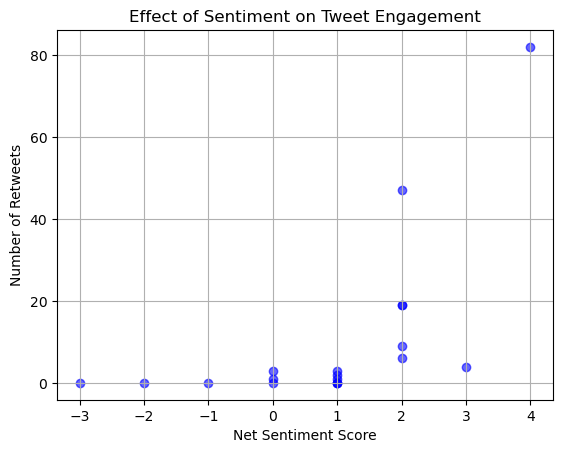

In [5]:
import matplotlib.pyplot as plt


x = []  # now for Net Score
y = []  # now for Number of Retweets

with open("assets/resulting_data.csv", 'r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    for row in csv_reader:
        x.append(int(row[4]))  # Net Score
        y.append(int(row[0]))  # Number of Retweets

plt.scatter(x, y, color="blue", alpha=0.6)
plt.title("Effect of Sentiment on Tweet Engagement")
plt.xlabel("Net Sentiment Score")      # X-axis now represents sentiment
plt.ylabel("Number of Retweets")       # Y-axis now represents engagement
plt.grid(True)
plt.show()


Interpretation of the above scatterplot

The scatter plot shows a weak positive relationship between the number of retweets and the tweet’s sentiment (net score). Tweets with higher net scores — indicating more positive sentiment — tend to receive more retweets, suggesting that users are more likely to share positive content. Conversely, negative or neutral tweets received little or no engagement.

We’ll use numpy.polyfit() to compute the best-fit line (slope and intercept).

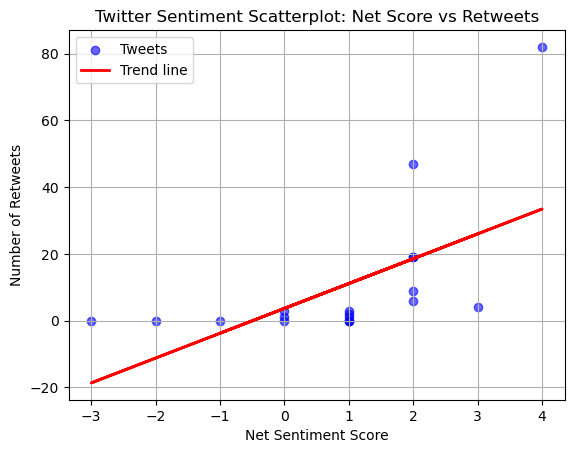

Regression line: y = 7.44x + 3.66


In [6]:
import numpy as np

# Create scatter plot
plt.scatter(x, y, color="blue", alpha=0.6, label="Tweets")

# Compute regression line (y = m*x + b)
m, b = np.polyfit(x, y, 1)
regression_line = [m * xi + b for xi in x]

# Plot regression line
plt.plot(x, regression_line, color="red", linewidth=2, label="Trend line")

# Customize labels and title
plt.title("Twitter Sentiment Scatterplot: Net Score vs Retweets")
plt.xlabel("Net Sentiment Score")     # Now on X-axis
plt.ylabel("Number of Retweets")      # Now on Y-axis
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Optional: print the regression formula
print(f"Regression line: y = {m:.2f}x + {b:.2f}")


### 📊 What this Scatter Plot Represents (Swapped Axes)

* **x-axis** → `Net Sentiment Score` (positive score – negative score; how positive or negative a tweet is)
* **y-axis** → `Number of Retweets` (how many people reshared the tweet)

Each dot = one tweet.
The red line = the *trend* showing how sentiment affects retweets.

---

### 📈 What an *Upward Slope* Means

If the regression line is **sloping upward**, it means:

> As the net sentiment score increases (tweets get more positive), the number of retweets tends to increase too.

In plain English:

* **More positive tweets** generally receive **more retweets**.
* There’s a **positive correlation** between positivity and engagement.

---

### 🧠 Why That Matters

That suggests:

* People are **more likely to retweet** content that feels **positive or uplifting**.
* The more optimistic or encouraging a tweet is, the **higher its potential reach**.

It doesn’t prove that positive tweets *cause* more retweets — but it clearly shows a **trend**:

> Happier tweets → wider audience.

---

### ⚠️ If the Line Were Flat or Downward

* **Flat line (slope ≈ 0)** → no clear relationship.
  Sentiment doesn’t influence retweet behavior.
* **Downward slope** → more negative tweets get more retweets — common with **controversial or outrage-driven topics**.
